In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
                        

In [3]:
def load_data():
    df_togo = pd.read_csv('data/togo-dapaong_qc.csv')
    return df_togo 

In [4]:
data = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/togo-dapaong_qc.csv")

In [5]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [6]:
data = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/togo-dapaong_qc.csv")
df = pd.read_csv('C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/togo-dapaong_qc.csv', parse_dates=['Timestamp']) 
df.set_index('Timestamp', inplace=True)
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [7]:
import pandas as pd

# Load data
df = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/togo-dapaong_qc.csv")

# Summary Statistics
print("--- Summary Statistics ---")
print(df[numeric_cols].describe())

# Missing Value Report
missing_report = df.isna().sum().sort_values(ascending=False)
total_rows = len(df)
missing_percentage = (missing_report / total_rows) * 100

print("\n--- Missing Value Percentage ---")
print(missing_percentage)

# Columns with >5% nulls
high_nulls = missing_percentage[missing_percentage > 5].index.tolist()
print(f"\nColumns with >5% nulls: {high_nulls}")


--- Summary Statistics ---
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%   

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import os

# ✅ Load data first
df = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/togo-dapaong_qc.csv")

# ✅ Make a working copy
df_cleaned = df.copy()

# ✅ Outlier Detection using Z-score
for col in key_cols:
    # Compute Z-scores only on non-null data
    z_scores = np.abs(stats.zscore(df_cleaned[col].dropna()))

    # Outlier indices (Z > 3)
    outlier_indices = df_cleaned[col].dropna().index[z_scores > 3]
    
    # Replace outliers with NaN
    df_cleaned.loc[outlier_indices, col] = np.nan
    print(f"Flagged/Replaced {len(outlier_indices)} outliers in {col}")

# ✅ Missing Value Imputation (Median)
for col in key_cols:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in {col} with median: {median_val}")

# ✅ Drop Comments column if it exists
if 'Comments' in df_cleaned.columns:
    df_cleaned.drop(columns=['Comments'], inplace=True)

# ✅ Dynamically generate clean filename
input_file = "togo-dapaong_qc.csv"
file_name = os.path.splitext(input_file)[0]  # → "benin-malanville"
import os
os.makedirs("data", exist_ok=True)
output_path = f"data/{file_name}_clean.csv"

# ✅ Save cleaned file
df_cleaned.to_csv(output_path, index=False)

print(f"\nCleaned data saved to {output_path}")


Flagged/Replaced 305 outliers in GHI
Flagged/Replaced 1062 outliers in DNI
Flagged/Replaced 3415 outliers in DHI
Flagged/Replaced 137 outliers in ModA
Flagged/Replaced 206 outliers in ModB
Flagged/Replaced 3510 outliers in WS
Flagged/Replaced 3915 outliers in WSgust
Imputed missing values in GHI with median: 2.0
Imputed missing values in DNI with median: 0.0
Imputed missing values in DHI with median: 1.8


C:\Users\natna\AppData\Local\Temp\ipykernel_22408\1324062541.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
C:\Users\natna\AppData\Local\Temp\ipykernel_22408\1324062541.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Imputed missing values in ModA with median: 4.3
Imputed missing values in ModB with median: 4.2
Imputed missing values in WS with median: 2.2
Imputed missing values in WSgust with median: 2.9

Cleaned data saved to data/togo-dapaong_qc_clean.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset using correct path
df_togo = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/togo-dapaong_qc.csv")

# Check columns
print(df_togo.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


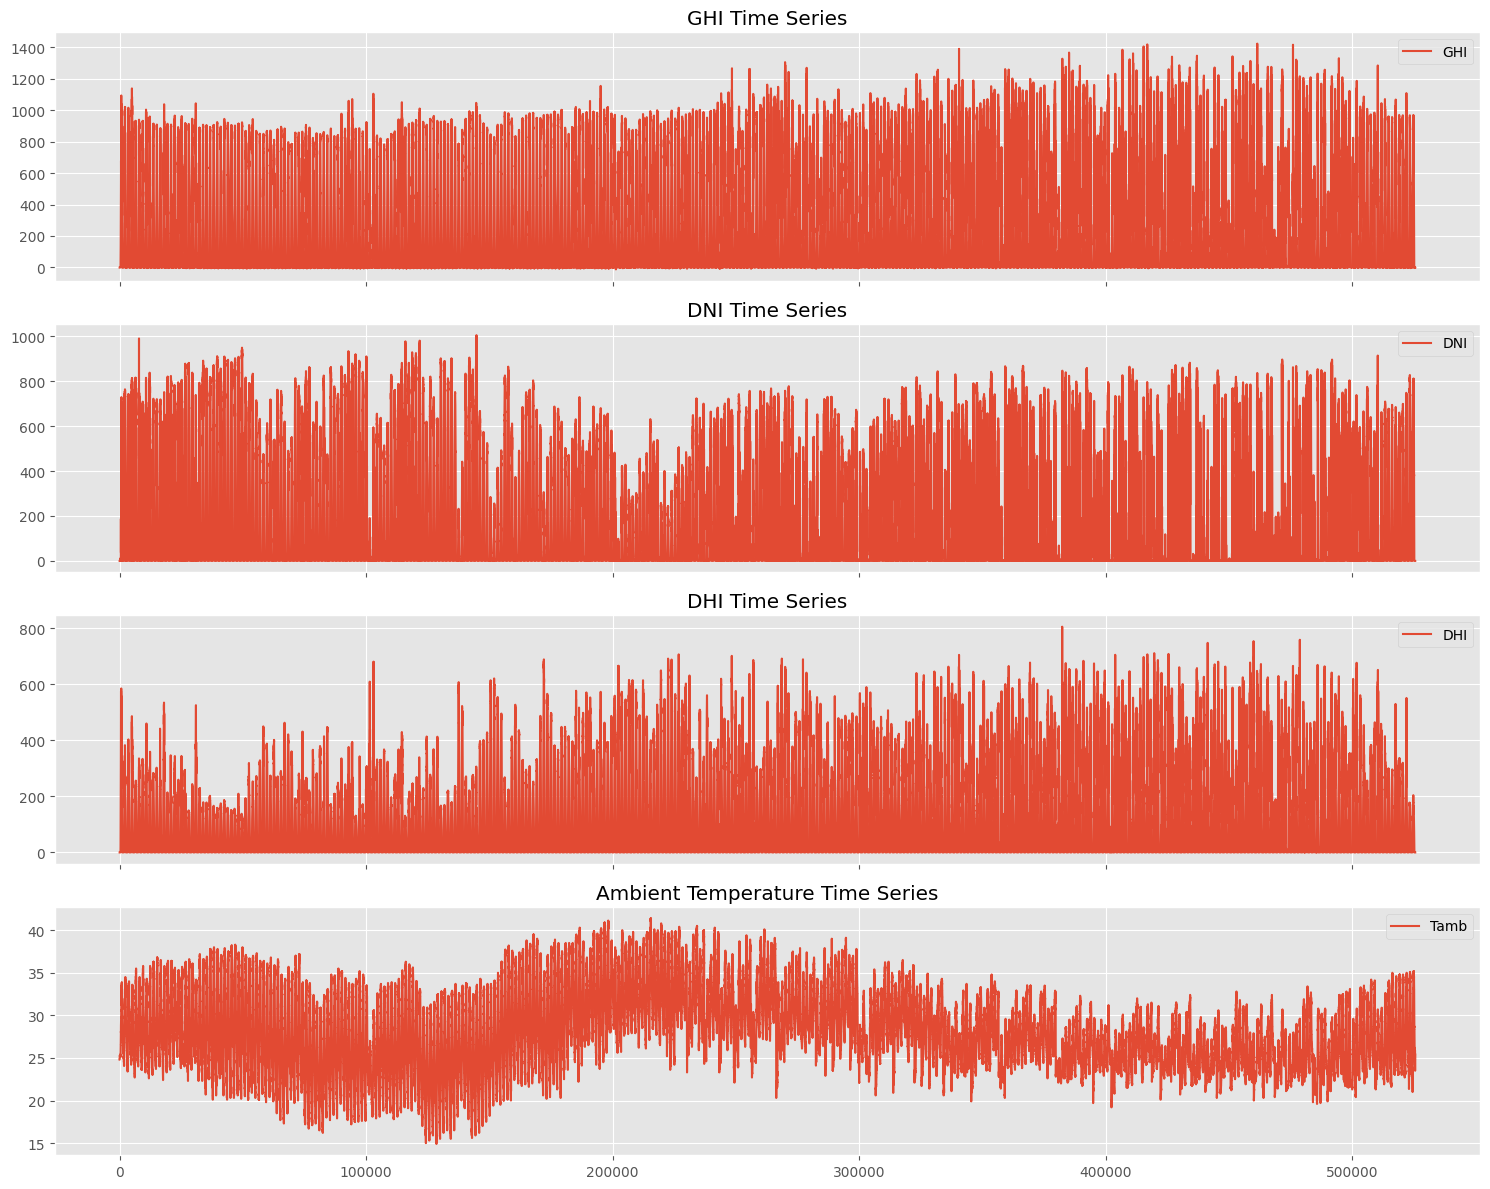

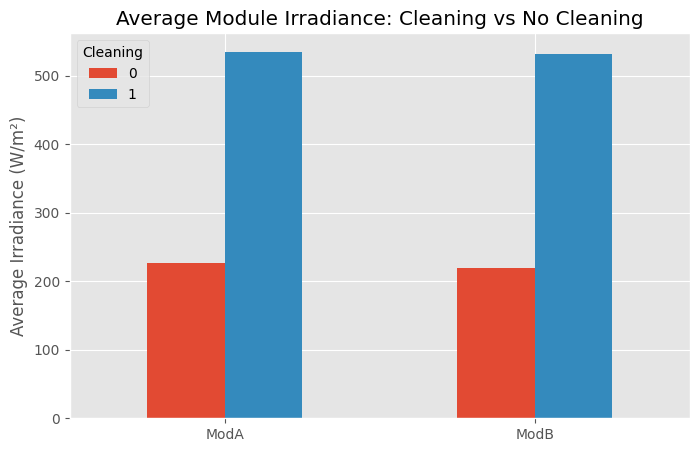

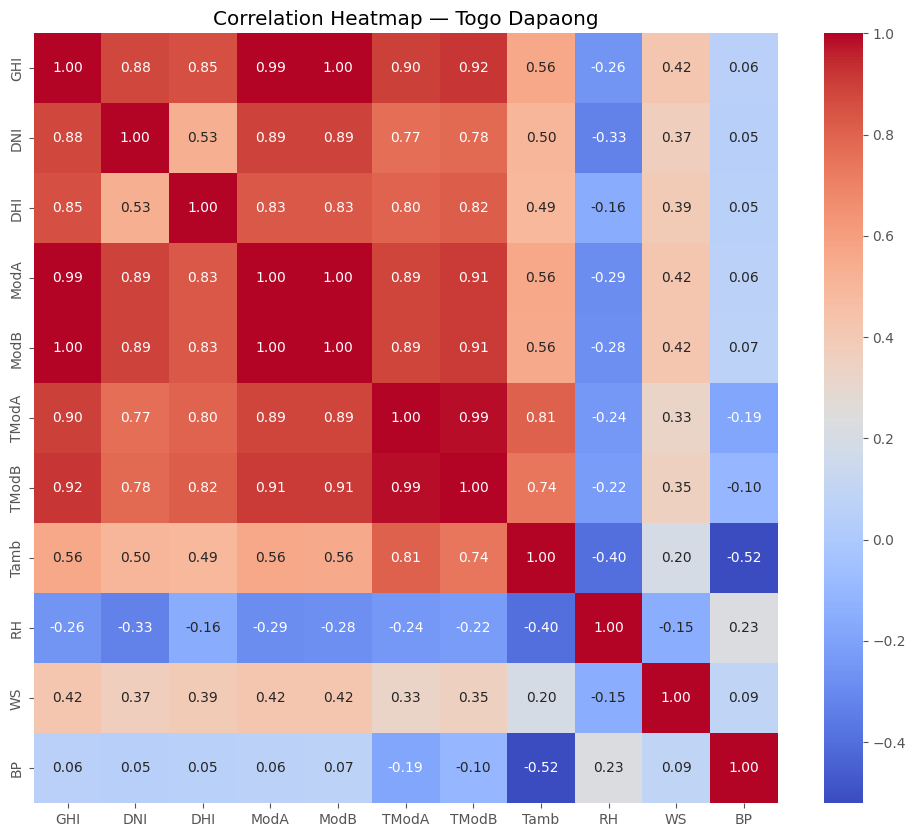

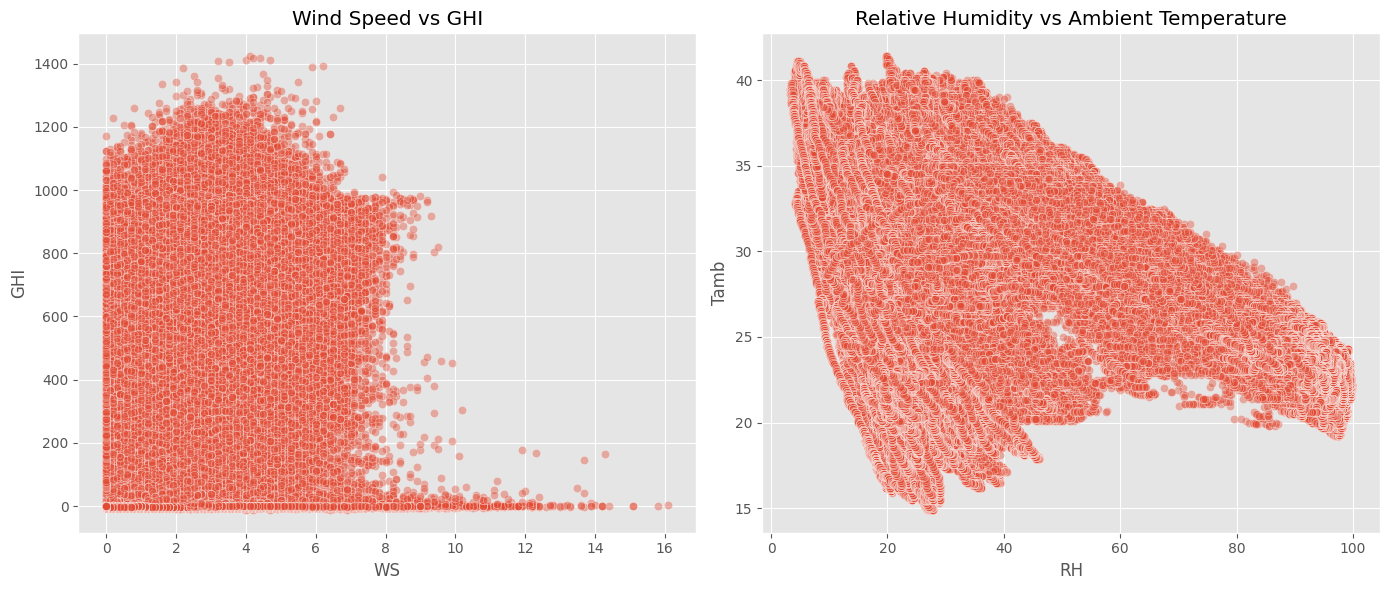

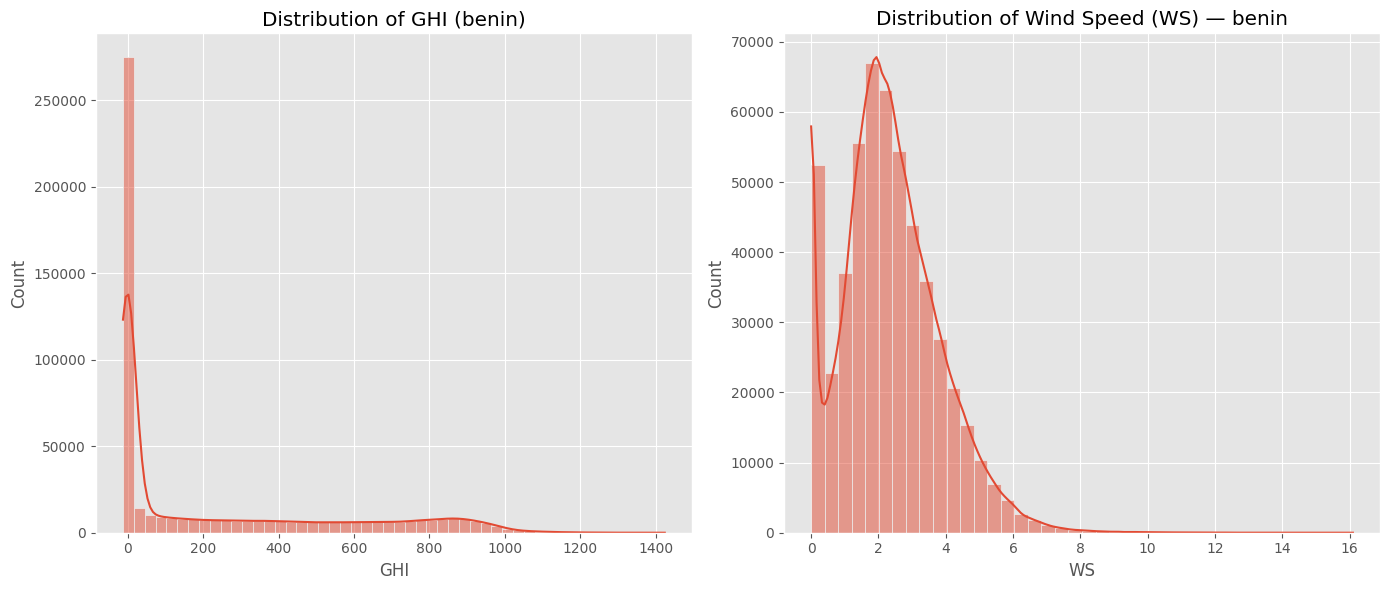

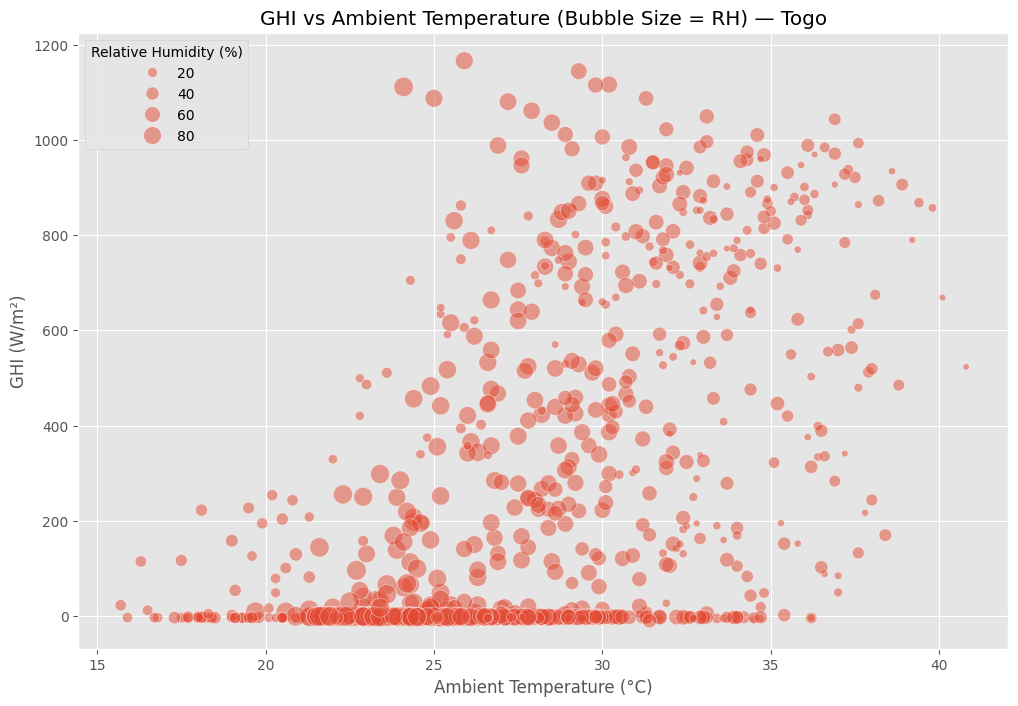

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style
plt.style.use("ggplot")

# ---------------------------------------------
# ✅ TIME SERIES PLOTS (GHI, DNI, DHI, Tamb)
# ---------------------------------------------
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

df_togo[['GHI']].plot(ax=axes[0], title='GHI Time Series')
df_togo[['DNI']].plot(ax=axes[1], title='DNI Time Series')
df_togo[['DHI']].plot(ax=axes[2], title='DHI Time Series')
df_togo[['Tamb']].plot(ax=axes[3], title='Ambient Temperature Time Series')

plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ CLEANING IMPACT (Cleaning column exists)
# ---------------------------------------------
cleaning_impact = df_togo.groupby('Cleaning')[['ModA', 'ModB']].mean()

cleaning_impact.T.plot(
    kind='bar',
    figsize=(8, 5),
    title='Average Module Irradiance: Cleaning vs No Cleaning'
)

plt.xticks(rotation=0)
plt.ylabel('Average Irradiance (W/m²)')
plt.show()

# ---------------------------------------------
# ✅ CORRELATION HEATMAP
# ---------------------------------------------
corr_vars = [
    'GHI','DNI','DHI','ModA','ModB','TModA','TModB',
    'Tamb','RH','WS','BP'
]

# keep only columns that exist
corr_vars = [col for col in corr_vars if col in df_togo.columns]

plt.figure(figsize=(12, 10))
sns.heatmap(df_togo[corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Togo Dapaong")
plt.show()

# ---------------------------------------------
# ✅ SCATTER PLOTS
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# WS vs GHI
sns.scatterplot(
    x='WS', y='GHI', data=df_togo, alpha=0.4, ax=axes[0]
)
axes[0].set_title("Wind Speed vs GHI")

# RH vs Tamb
sns.scatterplot(
    x='RH', y='Tamb', data=df_togo, alpha=0.4, ax=axes[1]
)
axes[1].set_title("Relative Humidity vs Ambient Temperature")

plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ HISTOGRAMS for GHI & WS
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_togo['GHI'].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of GHI (benin)")

sns.histplot(df_togo['WS'].dropna(), bins=40, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Wind Speed (WS) — benin")

plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ BUBBLE CHART (GHI vs Tamb with RH bubble size)
# ---------------------------------------------
plt.figure(figsize=(12, 8))

# Sample only if dataset is huge
sample_df = df_togo.sample(n=1000, random_state=42) if len(df_togo) > 1000 else df_togo

sns.scatterplot(
    x='Tamb', 
    y='GHI', 
    size='RH',
    sizes=(20, 200),
    alpha=0.5,
    edgecolor='white',
    data=sample_df
)

plt.title("GHI vs Ambient Temperature (Bubble Size = RH) — Togo")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.legend(title="Relative Humidity (%)")

plt.show()
